In [26]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
user_data = np.loadtxt('data/data.txt').astype(int)
movie_desc = np.loadtxt('data/movies.txt', dtype='str', delimiter='\t')
movie_names = dict([(int(line[0]), line[1]) for line in movie_desc])
movie_labels = movie_desc[:,2:].astype('float')
M = max(user_data[:,0]).astype(int) # users
N = max(user_data[:,1]).astype(int) # movies
print("Finished. M =", M, " N =", N)

Finished. M = 943  N = 1682


In [24]:
# Initialize the ratings array
Y = np.ndarray((M, N))

# Process ratings for every movie
for line in user_data:
    user_id = line[0]
    movie_id = line[1]
    rating = line[2]
    Y[user_id-1][movie_id-1] = rating

## Visualize all ratings

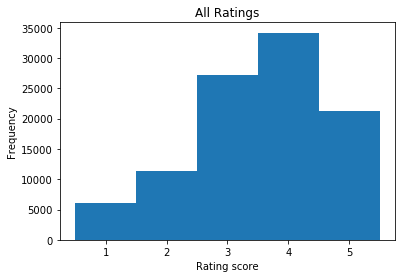

In [32]:
# All Ratings
all_ratings = user_data[:,2]
plt.hist(all_ratings, bins=5, range=(0.5, 5.5))
plt.title('All Ratings')
plt.xlabel('Rating score')
plt.ylabel('Frequency')
plt.show()

## Visualize 10 most popular

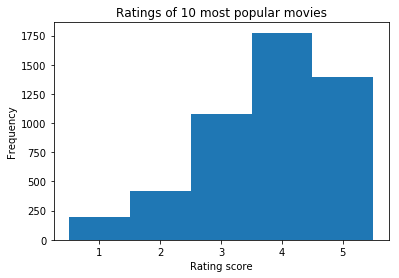

In [33]:
# Top 10 popular
movie_ids, counts = np.unique(user_data[:,1], return_counts=True)
popularities = sorted(zip(movie_ids, counts),key = lambda x: x[1])
top_ids, top_counts = zip(*popularities[-10:])
top10ratings = [line[2] for line in user_data if line[1] in top_ids]
plt.hist(top10ratings, bins=5, range=(0.5, 5.5))
plt.title('Ratings of 10 most popular movies')
plt.xlabel('Rating score')
plt.ylabel('Frequency')
plt.show()

## Visualize 10 highest rated

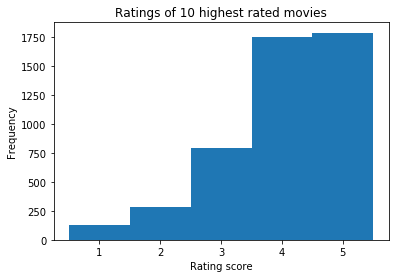

In [34]:
# Top 10 highest rated
avg_ratings = []
for j in range(N):
    avg_rating = np.sum(Y[:, j]) / n_reviews
    avg_ratings.append(avg_rating)
review_counts = np.array(review_counts)
avg_ratings = np.array(avg_ratings)
best_indices = heapq.nlargest(10, range(N), avg_ratings.take)
highest10ratings = [line[2] for line in user_data if line[1]-1 in best_indices]

plt.hist(highest10ratings, bins=5, range=(0.5, 5.5))
plt.title('Ratings of 10 highest rated movies')
plt.xlabel('Rating score')
plt.ylabel('Frequency')
plt.show()

## Visualize three genres (action, comedy, and fantasy)

In [40]:
# Visualize ratings of a genre
action = []
comedy = []
fantasy = []
# Each line is id, title, genre
for line in movie_desc:
    if line[3] == "1":
        action.append(line[0])
    elif line[7] == "1":
        comedy.append(line[0])
    elif line[11] == "1":
        fantasy.append(line[0])
action = np.array(action).astype('int')
comedy = np.array(comedy).astype('int')
fantasy = np.array(fantasy).astype('int')
print("action:", action.shape, "comedy:", comedy.shape, "fantasy:", fantasy.shape)

action: (251,) comedy: (473,) fantasy: (11,)


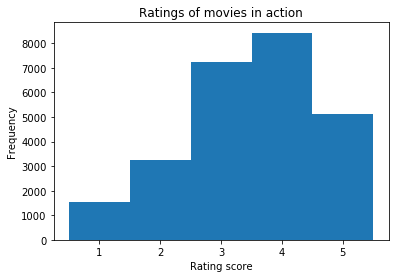

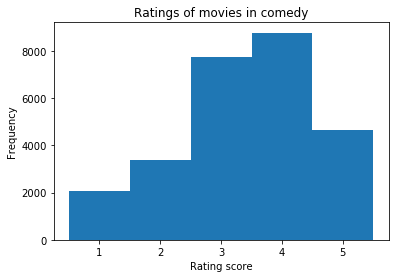

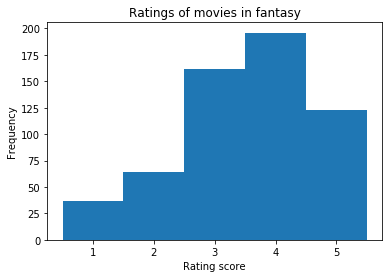

In [46]:
def visualize_genre_ratings(genre, genre_name):
    genre_ratings = [line[2] for line in user_data if line[1] in genre]
    plt.figure()
    plt.hist(genre_ratings, bins=5, range=(0.5, 5.5))
    plt.title('Ratings of movies in ' + str(genre_name))
    plt.xlabel('Rating score')
    plt.ylabel('Frequency')
visualize_genre_ratings(action, 'action')
visualize_genre_ratings(comedy, 'comedy')
visualize_genre_ratings(fantasy, 'fantasy')